**IMPORTING & PROCESSING DATASET**

In [ ]:
import pandas as pd
import kagglehub
import os
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import ttest_ind



In [ ]:
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break
df = pd.read_csv(dataset_path)

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'wine-quality-dataset' dataset.
Path to dataset files: /kaggle/input/wine-quality-dataset


In [ ]:
# Normalizing all acid columns to get total acid average
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['fixed acidity', 'volatile acidity', 'citric acid']] = scaler.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid']])
df_scaled['average_acid'] = df_scaled[['fixed acidity', 'volatile acidity', 'citric acid']].mean(axis=1)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,average_acid
0,0.247788,0.397260,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.215016
1,0.283186,0.520548,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.267911
2,0.283186,0.438356,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0.253847
3,0.584071,0.109589,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0.417887
4,0.247788,0.397260,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0.215016


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  average_acid          1143 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 125.1 KB


In [ ]:
print("Rows:", df_scaled.shape[0]) # rows
print("Cols:", df_scaled.shape[1]) # cols

Rows: 1143
Cols: 14


In [ ]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,average_acid
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.328417,0.281739,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379,0.292840
std,0.154654,0.123036,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116,0.095925
min,0.000000,0.000000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.067927
25%,0.221239,0.186644,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000,0.220153
50%,0.292035,0.273973,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000,0.280386
75%,0.398230,0.356164,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000,0.347205
max,1.000000,1.000000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000,0.706813


In [ ]:
df_scaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'average_acid'],
      dtype='object')

**CORRELATION & COVARIATION**



Correlation between alcohol and quality is 0.4848662118085116
Covariation between alcohol and quality is 0.42283216860005757



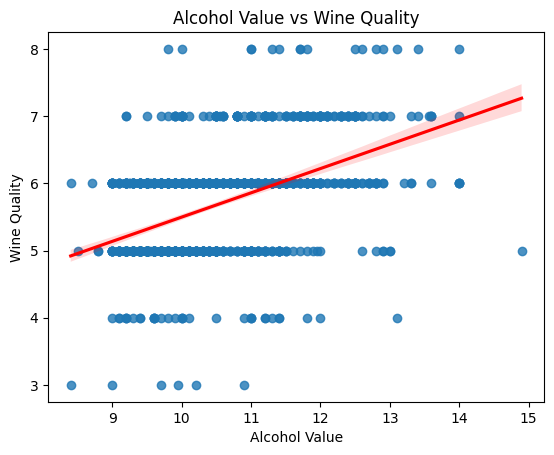

In [ ]:
# Correlation & Covariation between alcohol content and quality
corr = df_scaled['alcohol'].corr(df_scaled['quality'])
cov = df_scaled['alcohol'].cov(df_scaled['quality'])
print(f"Correlation between alcohol and quality is {corr}")
print(f"Covariation between alcohol and quality is {cov}")
print()

sns.regplot(x='alcohol', y='quality', data=df_scaled, line_kws={'color': 'red'})
plt.title("Alcohol Value vs Wine Quality")
plt.xlabel("Alcohol Value")
plt.ylabel("Wine Quality")
plt.show()

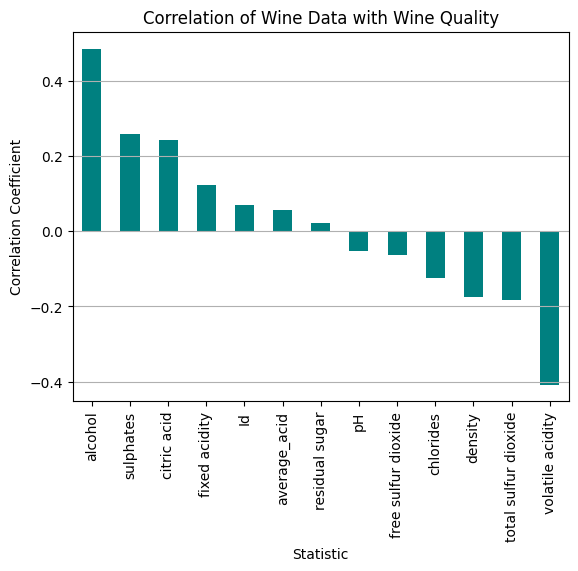

In [ ]:
# How all variables correlate compared to Wine Quality
total_corr = df_scaled.corr()['quality'].sort_values(ascending=False)
total_corr.drop('quality').plot(kind='bar', color='teal')
plt.title('Correlation of Wine Data with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Statistic')
plt.grid(axis='y')
plt.show()

**HYPOTHESIS TESTING**

2 Sample T-Test
H0: There is no difference in acid content in higher quality wines compared to the acid content in lower quality wines.

HA: There is a signficant difference in acid content in higher quality wines compared to the acid content in lower quality wines.


question ideas
do high quality wines have more alc
is volatile acidity lower in high quality alc
sulphate level and quality



In [ ]:
# average acid vs quality hypo test
length = df.shape[0]
better = df_scaled[df_scaled['quality'] >= 7]['average_acid']
worse = df_scaled[df_scaled['quality'] <= 5]['average_acid']

t_stat, p_value = ttest_ind(better, worse, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis - acid levels do differ in diff wine qualities")
else:
  print("Fail to reject the null hypothesis - acid levels don't differ in wine qualities")

T-statistic: 2.777796854498113
P-value: 0.005940515429995205
Reject the null hypothesis - acid levels do differ in diff wine qualities


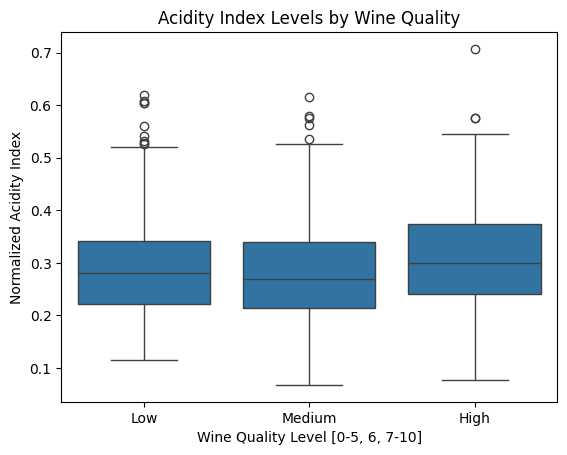

In [ ]:
sns.boxplot(x=pd.cut(df_scaled['quality'], bins=[0,5,6,10], labels=['Low','Medium','High']), y='average_acid', data=df_scaled)
plt.title("Acidity Index Levels by Wine Quality")
plt.xlabel("Wine Quality Level [0-5, 6, 7-10]")
plt.ylabel("Normalized Acidity Index")
plt.show()


We can see the outliers really easily on the boxplots. Some of the data points are easily greater than Q3 + 1.5 IQR (InterQuartile Range (Q3-Q1)), meaning these data points fall significantly outside of the main distribution.

**Chi-Squared Test**

Contingency Table: quality_level  Low  Medium  High
acid_level                      
Low            260     254    61
Medium         245     191    84
High            17      17    14
Chi-square statistic: 19.840289726067923
P-value: 0.000536987561342316
Reject null hypothesis


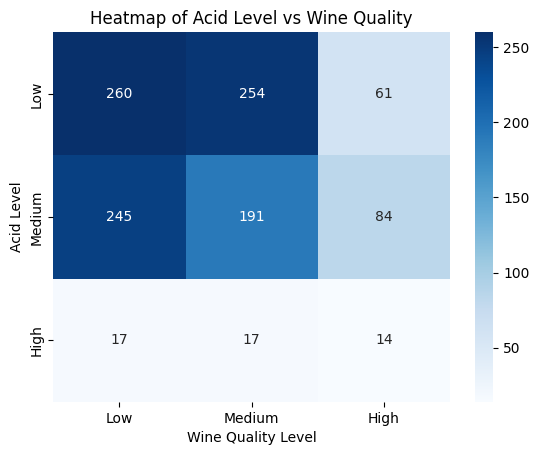

In [ ]:
from scipy.stats import chi2_contingency

df_scaled['acid_level'] = pd.cut(df_scaled['average_acid'], bins=3, labels=['Low','Medium','High'])
df_scaled['quality_level'] = pd.cut(df_scaled['quality'], bins=[0,5,6,10], labels=['Low','Medium','High'])

contingency_table = pd.crosstab(df_scaled['acid_level'], df_scaled['quality_level'])
print("Contingency Table:", contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title("Heatmap of Acid Level vs Wine Quality")
plt.ylabel("Acid Level")
plt.xlabel("Wine Quality Level")
plt.show()


The Chi-Squared test is used to determine if there is a significant association between two categorical variables. In this case, we are examining the relationship between 'acid_level' and 'quality_level'.
Reject null hypothesis: Since the p-value (0.0005) is less than the significance level (commonly 0.05), we reject the null hypothesis. This suggests there is a statistically significant association between acid level and wine quality level. The heatmap visually represents the contigency table.

**Observations**
1) The dataset contains 1143 wine entries and 14 columns to differentiate all the features amongst them.
2) The features with extreme outliers are residual sugar, and total sulfur dioxide.
3) Many of the chemical features are right-skewed like with residual sugar and sulphates. This essentially tells us that most of the wine entries have lower values but with a few outliers.
4) There is a strong correlation between free sulfur dioxide and total sulfur dioxide.
5) Correlation Analysis: The correlation between alcohol and quality is moderately positive, around 0.485.
6) Covariance is also positive, which indicates that wines with higher alcohol levels tend to have higher quality ratings.
7) From Correlation/Covariance we can see that alcohol levels are important predictive analysis for wine quality
8) For one hypothesis testing we looked at average acid content vs wine qualities.
H0: Average acid content didn't differ with wine qualities
HA: Average acid content did differ with wine qualities
We did a two tailed t_test, and found that p-value to be 0.005940515429995205
This means we are pretty confident in rejecting the null hypothesis, and confidently saying that acid levels do differ with wine quality.
9) We can see the outliers really easily on the boxplots. Some of the data points are easily greater than Q3 + 1.5 IQR (InterQuartile Range (Q3-Q1)), meaning these data points fall significantly outside of the main distribution.
10) The Chi-Squared test is used to determine if there is a significant association between two categorical variables. In this case, we are examining the relationship between 'acid_level' and 'quality_level'. Reject null hypothesis: Since the p-value (0.0005) is less than the significance level (commonly 0.05), we reject the null hypothesis. This suggests there is a statistically significant association between acid level and wine quality level. The heatmap visually represents the contingency table.
